# Various Performance Metrics

Here's what we will try out:
 * *Classification*：Accuracy, Error rate, True Positive Rate, False Negative Rate, Specificity, Prcesion, Recall, F1-Measure, ROC Curve, AUC, Log Loss 
 * *Regression*： Mean Squared Error, Root Mean Squared Error, Relative Squared Error, Mean Absolute Error 
 * *Clustering*： Silhouette Score, Rand Index, Mutual Information 

# Metrics for classification

We'll use the ["monks" data](https://api.openml.org/d/334) - this is a totally made up toy dataset.
It's (sole?) virtue here is that there are no missing values, so we can go straight to the prediction of the class.

In [76]:
import pandas as pd
monks_data =pd.read_csv("https://www.openml.org/data/get_csv/52237/php4fATLZ.csv")
monks_data.head()

,class,attr1,attr2,attr3,attr4,attr5,attr6
0,0,1,1,1,1,2,2
1,0,1,1,1,1,4,1
2,0,1,1,1,2,1,1
3,0,1,1,1,2,1,2
4,0,1,1,1,2,2,1


### Then we split the data to train and test subsets as *ONLY* the training data will be used to learn the imputers then the learnt models are applied to the test data

In [77]:
from sklearn.model_selection import train_test_split
y=monks_data['class']
X=monks_data.drop(['class'], axis=1)
X_monks_train, X_monks_test, y_monks_train, y_monks_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
X_monks_train.head()

,attr1,attr2,attr3,attr4,attr5,attr6
272,1,3,1,1,4,2
600,3,3,2,3,4,2
479,3,1,1,3,4,1
436,2,3,2,1,2,2
383,2,2,1,3,4,1


In [79]:
from sklearn.metrics import f1_score  #We use f-measure because the classes are not balanced

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_monks_train, y_monks_train)
print("F1 score = ", f1_score(clf.predict(X_monks_test), y_monks_test))

F1 score =  0.7079646017699115


In [80]:
#from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
#clf = MLPClassifier(random_state=1, max_iter=300)
#clf = GaussianNB()

clf.fit(X_monks_train, y_monks_train)
y_pred     = clf.predict(X_monks_test)
print(y_pred[:25])


[0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]


In [81]:
y_pred_prob = clf.predict_proba(X_monks_test)
print(y_pred_prob[:5,:])

[[0.99 0.01]
 [0.68 0.32]
 [0.27 0.73]
 [0.84 0.16]
 [1.   0.  ]]


### Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_monks_test, y_pred)
print(cm)

[[108   8]
 [ 25  40]]


### TP, FN, TN, FP

In [83]:
tn, fp, fn, tp = cm.ravel()
print("TP={}".format(tp))
print("FN={}".format(fn))
print("TN={}".format(tn))
print("FP={}".format(fp))

TP=40
FN=25
TN=108
FP=8


### We can calculate Accuracy, TPR, ... based on the confusion matrix first

In [84]:
print("accuracy = {}".format((tp+tn)/(tn+fp+fn+tp)))
print("TPR/Recall={}".format(tp/(tp+fn)))
print("specificity={}".format(tn/(tn+fp)))
print("Precision={}".format(tp/(tp+fp)))

accuracy = 0.8176795580110497
TPR/Recall=0.6153846153846154
specificity=0.9310344827586207
Precision=0.8333333333333334


### Use sklearn.metrics  

### Accuracy

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_monks_test, y_pred)

0.8176795580110497

### Recall

In [86]:
from sklearn.metrics import recall_score
r=recall_score(y_monks_test, y_pred)
print(r)

0.6153846153846154


### Recall on the negative class == specificity

In [87]:
from sklearn.metrics import recall_score
recall_score(y_monks_test, y_pred, pos_label=0)

0.9310344827586207

### Precision

In [88]:
from sklearn.metrics import precision_score
p=precision_score(y_monks_test, y_pred)
print(p)

0.8333333333333334


### F1-Measure

In [89]:
print("f1-score={}".format(2*p*r/(p+r)))

from sklearn.metrics import f1_score
f1 = f1_score(y_monks_test, y_pred)
print("f1-score={}".format(f1))


f1-score=0.7079646017699115
f1-score=0.7079646017699115


### ROC Curve and AUC

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_monks_test, y_pred_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
#print(fpr)
#print(tpr)
#print(thresholds)
roc_auc

0.9214190981432361

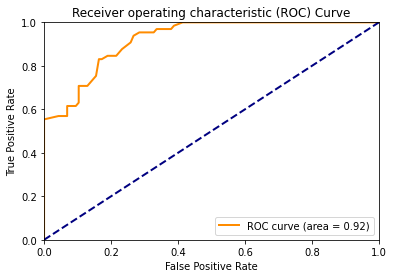

In [91]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Log Loss

In [92]:
from sklearn.metrics import log_loss
log_loss(y_monks_test, y_pred_prob)

0.36387331889975333

# Metrics for Regression

For this, we use the Boston Housing data set, but check out the warning that sklearn throws up for this. Interesting!

 * the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)
 * someone [digging](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8)

In [93]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
X, y = load_boston(return_X_y=True);
#split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [94]:
#from sklearn.linear_model import LinearRegression
from sklearn import ensemble

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params).fit(X_train, y_train)
#reg = LinearRegression().fit(X_train, y_train)
y_test_pred = reg.predict(X_test)
print(y_test_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


[26.35497356 29.90000099 25.79138469 27.75574031 19.95399255 14.46570703
 43.86985834 16.16183396 21.70529532 46.74208658 20.41070998 25.0941999
 24.94103047 31.04720686 31.95840841 44.80084816 24.601678   23.83255727
 22.12704594 17.63041631 32.2828448  15.87798625 21.52988144 24.33697425
 35.50388486 19.91504251 17.72091239 15.89044066 43.96752257 13.90768154
 32.15116191 32.26845592 23.8358937  24.94084682 17.20563379 20.74141444
  9.35665285 34.19459986 24.07688085 22.78786443 43.2432931  25.65518455
 10.97432174 28.0325462  19.29589853 26.47726882 20.4949354  20.8207616
 49.35838219 16.36503525 20.63220003 14.81369304 21.55346565 43.83011809
 26.99595671 33.83750777 20.7831629  20.60845841 21.08214789 31.4286236
 20.19647338 21.62464525 44.89854051 42.52608984 25.88825021 15.83900012
 23.30884599  9.96649112 28.55862036 38.67729352 15.96373783 27.2067081
 17.98382462 45.63284696 24.81889387 18.63380788 40.05475295 10.20728419
 19.93174943 29.16084624 20.58667282 22.63650906 19.483

### MSE

In [95]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

14.651881063484899

### R-Squared

In [96]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))
print(reg.score(X_test, y_test))

0.8598988623957179
0.8598988623957179


### MAE

In [97]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_test_pred)

2.6666529971036064

#  Performance Metrics - Clustering

Examples here:
 * silhouette
 * Rand (named after Rand, not "random"!) 
 * mutual information
 * adjusted mutual information


In [98]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_monks_train)
kmeans_train_labels = kmeans.labels_
kmeans_test_labels  = kmeans.predict(X_monks_test)
print(kmeans_train_labels[:10])


[0 0 0 1 0 1 0 1 1 0]


In [99]:
from sklearn.metrics import silhouette_score
# do it for train and test sets
silhouette_score(X_monks_train, kmeans_train_labels, metric='euclidean'),    silhouette_score(X_monks_test, kmeans_test_labels, metric='euclidean')

(0.2335167660059811, 0.23844694525614454)

In [100]:
from sklearn.metrics import rand_score
# do it for train and test sets
rand_score(y_monks_train, kmeans_train_labels),   rand_score(y_monks_test, kmeans_test_labels)

(0.5010342084327765, 0.5027624309392266)

In [101]:
from sklearn.metrics import mutual_info_score
# do it for train and test sets
mutual_info_score(y_monks_train, kmeans_train_labels),    mutual_info_score(y_monks_test, kmeans_test_labels)

(0.0036744480935274604, 0.009083550889284059)

In [102]:
from sklearn.metrics import adjusted_mutual_info_score
# do it for train and test sets
adjusted_mutual_info_score(y_monks_train, kmeans_train_labels),    adjusted_mutual_info_score(y_monks_train, kmeans_train_labels)

(0.003733450637005814, 0.003733450637005814)